# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name #ask Erin why this is not "lat_lngs variable why is it lat_lng"
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build query ULR
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#printing beginning of the output message
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# setting up a variable for processing record
process_record = 0

# setting up lists to hold city data from each API call
city_name = []
city_country = []
city_date = []
city_lat = []
city_lng = []
city_humid = []
city_cloud = []
city_wind = []
city_temp = []

# response = json.dumps((requests.get(query_url + city).json()),indent=4)
# print(response)

# loop thhrough each api call and store each city data
for city in cities:
    
    # including exception logic for missing data in each loop
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_humid.append(response["main"]["humidity"])
        city_cloud.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_temp.append(response["main"]["temp_max"])
        process_record += 1
        print_city_name = response["name"]
        print(f"Processing Record {process_record} of Set XX | {print_city_name}")
        
    except:
        print("City not found. Skipping...")
    
    continue
        
    
#printing end of the output message   
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set XX | Dunedin
Processing Record 2 of Set XX | Tautira
Processing Record 3 of Set XX | Baruun-Urt
Processing Record 4 of Set XX | Bambanglipuro
Processing Record 5 of Set XX | Mwinilunga
Processing Record 6 of Set XX | Butaritari
Processing Record 7 of Set XX | Cabo San Lucas
Processing Record 8 of Set XX | Coquimbo
Processing Record 9 of Set XX | Aklavik
Processing Record 10 of Set XX | Port Alfred
Processing Record 11 of Set XX | Cherskiy
Processing Record 12 of Set XX | Carnarvon
City not found. Skipping...
Processing Record 13 of Set XX | Rikitea
Processing Record 14 of Set XX | Port Hardy
Processing Record 15 of Set XX | Port-Cartier
Processing Record 16 of Set XX | Oktyabr'skoye
Processing Record 17 of Set XX | Saint George
Processing Record 18 of Set XX | East London
City not found. Skipping...
Processing Record 19 of Set XX | Lavrentiya
Processing Record 20 of Set XX | Barrow
Processing Record 21 of

Processing Record 178 of Set XX | Bad Salzungen
Processing Record 179 of Set XX | Broome
Processing Record 180 of Set XX | Nianzishan
Processing Record 181 of Set XX | Tiksi
Processing Record 182 of Set XX | Turukhansk
Processing Record 183 of Set XX | Agadez
Processing Record 184 of Set XX | Harper
Processing Record 185 of Set XX | Ratnagiri
Processing Record 186 of Set XX | Luena
Processing Record 187 of Set XX | Port Augusta
Processing Record 188 of Set XX | Carndonagh
Processing Record 189 of Set XX | Senanga
Processing Record 190 of Set XX | Karratha
Processing Record 191 of Set XX | Terrace
Processing Record 192 of Set XX | Mogadishu
Processing Record 193 of Set XX | Ahipara
Processing Record 194 of Set XX | Mar del Plata
Processing Record 195 of Set XX | Portland
Processing Record 196 of Set XX | Turka
City not found. Skipping...
Processing Record 197 of Set XX | Lar
Processing Record 198 of Set XX | Teknāf
Processing Record 199 of Set XX | Khatanga
Processing Record 200 of Set 

Processing Record 356 of Set XX | Tarsus
Processing Record 357 of Set XX | North Bend
Processing Record 358 of Set XX | Ulaanbaatar
City not found. Skipping...
Processing Record 359 of Set XX | Kulhudhuffushi
Processing Record 360 of Set XX | Te Anau
Processing Record 361 of Set XX | Rafrāf
Processing Record 362 of Set XX | Alofi
Processing Record 363 of Set XX | Chapais
Processing Record 364 of Set XX | Aykhal
Processing Record 365 of Set XX | Okhotsk
Processing Record 366 of Set XX | Zarubino
City not found. Skipping...
Processing Record 367 of Set XX | Olafsvik
Processing Record 368 of Set XX | Mokrousovo
Processing Record 369 of Set XX | Chimbote
Processing Record 370 of Set XX | Ust-Tsilma
Processing Record 371 of Set XX | Boulder
Processing Record 372 of Set XX | Srednekolymsk
City not found. Skipping...
Processing Record 373 of Set XX | Syamzha
Processing Record 374 of Set XX | Río Cuarto
Processing Record 375 of Set XX | Kaili
Processing Record 376 of Set XX | Murray
Processing

Processing Record 535 of Set XX | Chiang Rai
Processing Record 536 of Set XX | Clyde River
Processing Record 537 of Set XX | Grootfontein
Processing Record 538 of Set XX | Nadezhda
Processing Record 539 of Set XX | Russell
Processing Record 540 of Set XX | Taos
City not found. Skipping...
Processing Record 541 of Set XX | Luján
Processing Record 542 of Set XX | Kadambūr
Processing Record 543 of Set XX | Eshowe
Processing Record 544 of Set XX | Yarmolyntsi
Processing Record 545 of Set XX | San Vicente
City not found. Skipping...
Processing Record 546 of Set XX | Nuuk
Processing Record 547 of Set XX | Umeå
City not found. Skipping...
Processing Record 548 of Set XX | La Ronge
Processing Record 549 of Set XX | Polyarny
Processing Record 550 of Set XX | Oussouye
Processing Record 551 of Set XX | Sungai Penuh
Processing Record 552 of Set XX | Cherëmukhovo
Processing Record 553 of Set XX | Sanguéya
Processing Record 554 of Set XX | Columbia
Processing Record 555 of Set XX | Kamaishi
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#creating data frame 
weather_data = pd.DataFrame({
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_temp,
    "Humidity": city_humid,
    "Cloudiness": city_cloud,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
})

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dunedin,-45.8742,170.5036,57.09,64,100,6.46,NZ,1649665687
1,Tautira,-17.7333,-149.1500,81.46,73,3,15.93,PF,1649665687
2,Baruun-Urt,46.6806,113.2792,42.75,21,20,13.62,MN,1649665688
3,Bambanglipuro,-7.9500,110.2833,83.88,73,91,10.29,ID,1649665688
4,Mwinilunga,-11.7358,24.4293,70.47,79,95,7.54,ZM,1649665688


In [5]:
# producing descriptive statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,21.398941,18.016182,60.054047,67.643885,61.037770,8.536511,1.649666e+09
std,32.902110,89.334077,24.327640,23.355054,39.822132,5.268755,7.982007e+01
min,-54.800000,-175.200000,-19.570000,1.000000,0.000000,0.000000,1.649665e+09
25%,-3.836550,-59.231700,43.010000,55.000000,20.000000,4.610000,1.649666e+09
50%,25.947350,23.275000,65.245000,73.500000,75.000000,7.495000,1.649666e+09
75%,48.425025,96.138050,78.557500,84.000000,100.000000,11.500000,1.649666e+09
max,78.218600,178.416700,109.440000,100.000000,100.000000,31.070000,1.649666e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# checking the data for cities with humidity level greater than 100%

if len(weather_data)==len(weather_data.loc[weather_data['Humidity'] <= 100]):
    sorted_weather_data = weather_data
    print("Skipping this step because no cities with himidity level of greater than 100% were identified")
else:
    sorted_weather_data = weather_data.loc[weather_data['Humidity'] <= 100]
    print("Cities with humidity levels of greater than 100% removed from the dataset")

Skipping this step because no cities with himidity level of greater than 100% were identified


In [7]:
# producing descriptive statistics on filterd data
sorted_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,21.398941,18.016182,60.054047,67.643885,61.037770,8.536511,1.649666e+09
std,32.902110,89.334077,24.327640,23.355054,39.822132,5.268755,7.982007e+01
min,-54.800000,-175.200000,-19.570000,1.000000,0.000000,0.000000,1.649665e+09
25%,-3.836550,-59.231700,43.010000,55.000000,20.000000,4.610000,1.649666e+09
50%,25.947350,23.275000,65.245000,73.500000,75.000000,7.495000,1.649666e+09
75%,48.425025,96.138050,78.557500,84.000000,100.000000,11.500000,1.649666e+09
max,78.218600,178.416700,109.440000,100.000000,100.000000,31.070000,1.649666e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = weather_data[weather_data['Humidity'] > 100].index
humidity_over_100

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data". 
clean_city_data = weather_data.drop(humidity_over_100,inplace=False)

#saving to csv file
clean_city_data.to_csv("output_data/WeatherPy.csv")

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dunedin,-45.8742,170.5036,57.09,64,100,6.46,NZ,1649665687
1,Tautira,-17.7333,-149.1500,81.46,73,3,15.93,PF,1649665687
2,Baruun-Urt,46.6806,113.2792,42.75,21,20,13.62,MN,1649665688
3,Bambanglipuro,-7.9500,110.2833,83.88,73,91,10.29,ID,1649665688
4,Mwinilunga,-11.7358,24.4293,70.47,79,95,7.54,ZM,1649665688


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

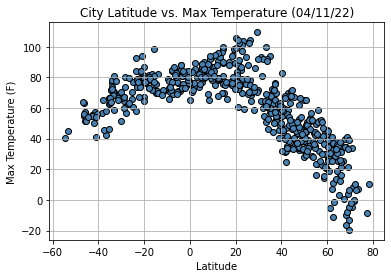

In [10]:
# creating a scatter plot  for latitude vs max temperature
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o",facecolor = "steelblue",edgecolor = "black")

# producing today's date for the graph title
date_today = datetime.now().strftime("%m/%d/%y")

# # incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date_today})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

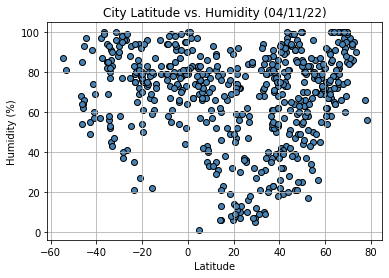

In [11]:
# creating a scatter plot  for latitude vs humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolor = "steelblue",edgecolor = "black")

# # incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date_today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/City Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

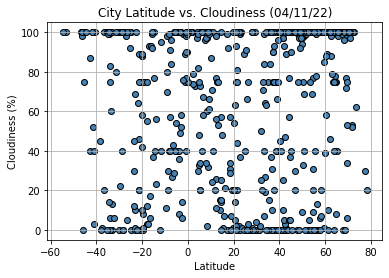

In [12]:
# creating a scatter plot  for latitude vs Cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolor = "steelblue",edgecolor = "black")

# # incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date_today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

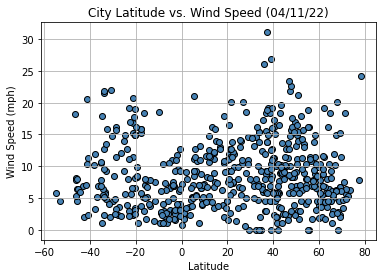

In [13]:
# creating a scatter plot  for latitude vs Wind Speed
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolor = "steelblue",edgecolor = "black")

# # incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date_today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

## Linear Regression

In [21]:
# sort the dataframe for northern and southern hemisphere and put into separate dataframes
north = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south = clean_city_data.loc[clean_city_data["Lat"] < 0]

# defining a function for the rest of regression graphs
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,facecolor = "steelblue",edgecolor = "black")
    plt.plot(x,regress_values,"r-",)
    plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7352940232987106


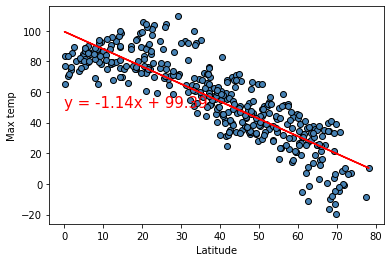

In [22]:
# using the function above, determine the x,y values for northern hemisphere
graph1 = linear_regression(north['Lat'],north['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.48698737212572285


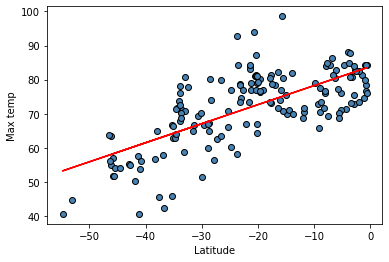

In [20]:
# using the function above, determine the x,y values for southern hemisphere
graph2 = linear_regression(south['Lat'],south['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max temp')
plt.show()

The r-value is: 0.6082708688906918


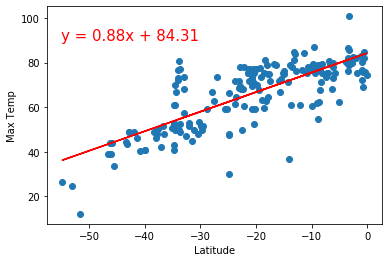

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06834324409846643


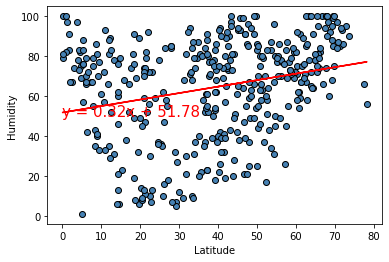

In [23]:
# using the function above, determine the x,y values for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
graph2 = linear_regression(north['Lat'],north['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.000543987878808455


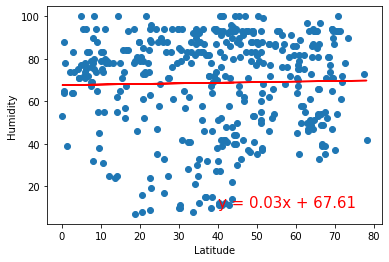

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.004580900278024177


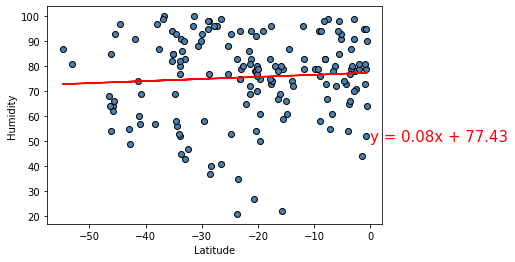

In [24]:
# using the function above, determine the x,y values for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
graph2 = linear_regression(south['Lat'],south['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.014985174297345524


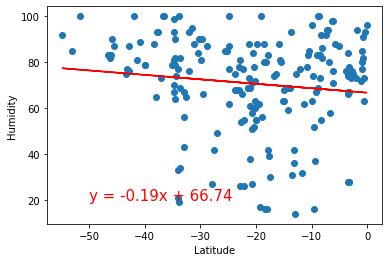

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02599075827026831


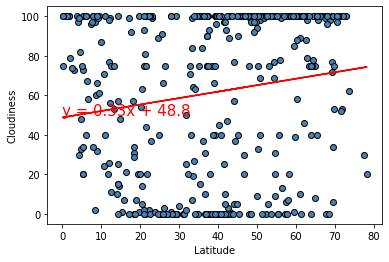

In [25]:
# using the function above, determine the x,y values for Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Reg
graph2 = linear_regression(north['Lat'],north['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.0020898727664228514


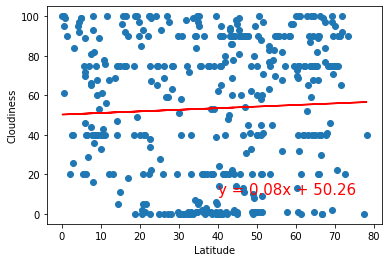

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00014587264858010912


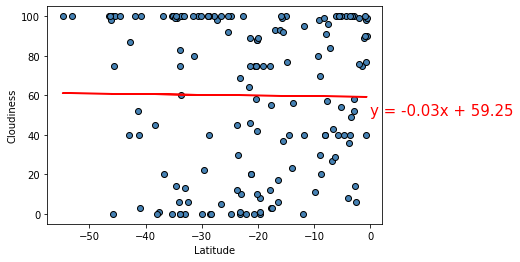

In [26]:
# using the function above, determine the x,y values for Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Reg
graph2 = linear_regression(south['Lat'],south['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.0035263772085582894


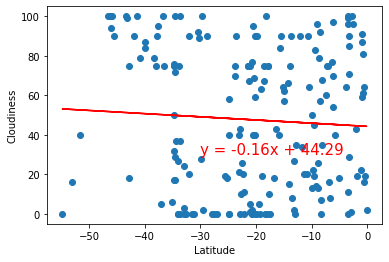

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 7.489621011432906e-05


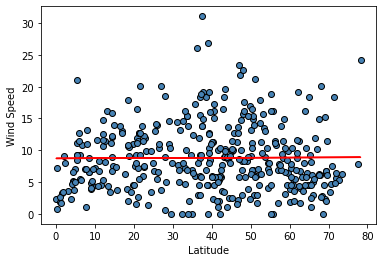

In [27]:
# using the function above, determine the x,y values for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Reg
graph2 = linear_regression(north['Lat'],north['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.04019723576144484


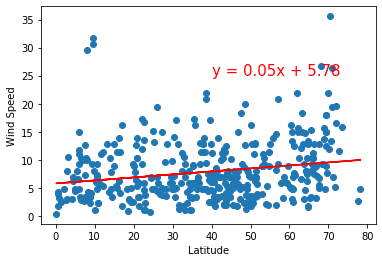

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04178908149505697


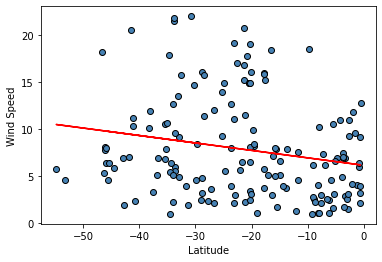

In [28]:
# using the function above, determine the x,y values for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Reg
graph2 = linear_regression(south['Lat'],south['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()